# Movie Data Analysis

## Overview

In this project, assigned by a business stakeholder, Microsoft, I've been assigned to use my data analysis knowledge to generate some insights so they can make an impact into the movies industry. These insights are concrete business recommendations that will assist Microsoft in creating their own first movie. 

## Business Problem
  
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. After making some research I determined that these are the main three business recommendations I need to focus in my analysis, to help Microsoft:
1. Genre
2. Studio 
3. Director 

My main object is to find which genre is the most popular and has the best gross income compared to the others. Once We have determined that, we’ll go after the studio, and last the directors that have had most success with movies involving the best genre.

## Data Understanding
For my analysis I utilized these three main data sources in order to have the most neat view of the data:  
1. __IMDB__ ,is an online database of information related to films, television series, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical
2. __The Numbers__, is a film industry data website that tracks box office revenue in a systematic, algorithmic way. The company also conducts research services and forecasts incomes of film projects.
3. __Box Office Mojo__,  is an American website that tracks box-office revenue in a systematic, algorithmic way. The site was founded in 1998 by Brandon Gray, and was bought in 2008 by IMDb, which itself is owned by Amazon.

Let's start by importing all important libraries that will help in our project analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3

# This code is to remove some warnings that will make our documents looks bad, even though the code is correct
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

### Movie Budget by The Numbers (tn.movie_budgets.csv.gz)
We will start by importing our first set of data from 'The Numbers'.

In [2]:
movie_budget = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


As we can see above we have the release date for each movie, production budget, domestic gross and worldwide gross. We will later remove domestic gross, because it is part of the worldwide gross.

In [3]:
# chooses only the year from the whole release date
movie_budget['year_date'] = pd.to_datetime(movie_budget['release_date'])
movie_budget['year_date'] = movie_budget['year_date'].dt.year.astype(np.int64)
movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_date
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015


Because I have analyzed all the tables before, I know that the other tables don't have the full release date of the movie , but just the year. So I created a new column which has only the year the movie was released. 

In [4]:
# Checking if the column we created is int64, we need it to be numerical like the other dates in the other tables
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
 6   year_date          5782 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 316.3+ KB


### Movie Gross by Box Office Mojo (bom.movie_gross)
Next we continue by importing our second set of data from the "Box Office Mojo". You might ask: why did I import? Answer is simple. I need 1 or 2 columns depending on which table I choose. This table has the studio for each movie, and i will need this info so I can use it later. 

In [5]:
movie_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Before merging this two tables or data sets, let's check if movie domestic gross is the same.

In [6]:
#Domestic gross by The Numbers
movie_budget[movie_budget['movie'] == 'Inception']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_date
137,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642",2010


In [7]:
#domestic Gross by Box Office Mojo
movie_gross[movie_gross['title'] == 'Inception']

,title,studio,domestic_gross,foreign_gross,year
3,Inception,WB,292600000.0,535700000,2010


As we can see they are the almost the same, just one is rounded.  
Time to merge our two tables into one and for this comes in help the year and the title of the movie. The codes beolow are not that important. I am just keeping track how many rows each table had before the merge and how many elements they had in comon after the merge.

In [8]:
movie_budget.shape

(5782, 7)

In [9]:
movie_gross.shape

(3387, 5)

In [10]:
# through this code we will merge the two tables, using the columns they have in common: 'movie'= 'title' & 'year_date'= 'year' 
budget_gross_df = pd.merge( movie_budget, movie_gross, left_on =['movie', 'year_date'], right_on = ['title', 'year'] )
budget_gross_df

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,year_date,title,studio,domestic_gross_y,foreign_gross,year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
1,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
2,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
3,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017,Justice League,WB,229000000.0,428900000,2017
4,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",2015,Spectre,Sony,200100000.0,680600000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1210,68,"Apr 27, 2012",Sound of My Voice,"$135,000","$408,015","$429,448",2012,Sound of My Voice,FoxS,408000.0,NaN,2012
1211,73,"Jun 15, 2012",Your Sister's Sister,"$120,000","$1,597,486","$3,090,593",2012,Your Sister's Sister,IFC,1600000.0,NaN,2012
1212,80,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",2015,The Gallows,WB (NL),22800000.0,20200000,2015
1213,86,"Jul 7, 2017",A Ghost Story,"$100,000","$1,594,798","$2,769,782",2017,A Ghost Story,A24,1600000.0,NaN,2017


As we can see from the new merged table, we can tell that from (5782, 7) & (3387, 5) that we had, we ended up to (1215, 12).
So less movies to analyse, but there are so many columns now, from which most of them are not needed. I will remove similiar and columns i dont need like : title which is similiar to movie, release date, year_date, domestic_gross(x and y) and foreign_gross.

The new table with all the elements i need should look like below.

In [11]:
budget_gross_main_df = budget_gross_df.drop(['title', 'release_date', 'year_date', 'domestic_gross_x', 'domestic_gross_y', 'foreign_gross'], axis = 1)
budget_gross_main_df

,id,movie,production_budget,worldwide_gross,studio,year
0,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875",BV,2011
1,4,Avengers: Age of Ultron,"$330,600,000","$1,403,013,963",BV,2015
2,7,Avengers: Infinity War,"$300,000,000","$2,048,134,200",BV,2018
3,9,Justice League,"$300,000,000","$655,945,209",WB,2017
4,10,Spectre,"$300,000,000","$879,620,923",Sony,2015
...,...,...,...,...,...,...
1210,68,Sound of My Voice,"$135,000","$429,448",FoxS,2012
1211,73,Your Sister's Sister,"$120,000","$3,090,593",IFC,2012
1212,80,The Gallows,"$100,000","$41,656,474",WB (NL),2015
1213,86,A Ghost Story,"$100,000","$2,769,782",A24,2017


Time to check if we have null or none values.

In [12]:
budget_gross_main_df.isnull().sum()

id                   0
movie                0
production_budget    0
worldwide_gross      0
studio               1
year                 0
dtype: int64

By the data we can see a null value so we are going to find which one that is and remove it.

In [13]:
budget_gross_main_df[budget_gross_main_df.studio.isnull()]

,id,movie,production_budget,worldwide_gross,studio,year
1000,34,Fireflies in the Garden,"$8,000,000","$3,587,191",NaN,2011


In [14]:
#droping the row with the null value
budget_gross_main_df = budget_gross_main_df.dropna( axis=0, subset=['studio'])
budget_gross_main_df

,id,movie,production_budget,worldwide_gross,studio,year
0,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875",BV,2011
1,4,Avengers: Age of Ultron,"$330,600,000","$1,403,013,963",BV,2015
2,7,Avengers: Infinity War,"$300,000,000","$2,048,134,200",BV,2018
3,9,Justice League,"$300,000,000","$655,945,209",WB,2017
4,10,Spectre,"$300,000,000","$879,620,923",Sony,2015
...,...,...,...,...,...,...
1210,68,Sound of My Voice,"$135,000","$429,448",FoxS,2012
1211,73,Your Sister's Sister,"$120,000","$3,090,593",IFC,2012
1212,80,The Gallows,"$100,000","$41,656,474",WB (NL),2015
1213,86,A Ghost Story,"$100,000","$2,769,782",A24,2017


After looking at the new table, we can sport that the values it has for production budget and worldwide gross are strings, so what are we going to do in this case is to remove the comma(,) and the dollar($) sign. Also we need to convert the string value to float so we can do mathematical analyses on the values.

In [15]:
# replace $ for budget & ww gross
budget_gross_main_df['production_budget'] = budget_gross_main_df['production_budget'].str.strip('$')
budget_gross_main_df['worldwide_gross'] = budget_gross_main_df['worldwide_gross'].str.strip('$')

# replace comma for budget & ww gross and convert into float value
budget_gross_main_df['production_budget'] = budget_gross_main_df['production_budget'].str.replace(',','').astype(float)
budget_gross_main_df['worldwide_gross'] = budget_gross_main_df['worldwide_gross'].str.replace(',','').astype(float)
budget_gross_main_df

,id,movie,production_budget,worldwide_gross,studio,year
0,2,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,BV,2011
1,4,Avengers: Age of Ultron,330600000.0,1.403014e+09,BV,2015
2,7,Avengers: Infinity War,300000000.0,2.048134e+09,BV,2018
3,9,Justice League,300000000.0,6.559452e+08,WB,2017
4,10,Spectre,300000000.0,8.796209e+08,Sony,2015
...,...,...,...,...,...,...
1210,68,Sound of My Voice,135000.0,4.294480e+05,FoxS,2012
1211,73,Your Sister's Sister,120000.0,3.090593e+06,IFC,2012
1212,80,The Gallows,100000.0,4.165647e+07,WB (NL),2015
1213,86,A Ghost Story,100000.0,2.769782e+06,A24,2017


In [16]:
#check if the two colomns are float
budget_gross_main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1214 entries, 0 to 1214
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1214 non-null   int64  
 1   movie              1214 non-null   object 
 2   production_budget  1214 non-null   float64
 3   worldwide_gross    1214 non-null   float64
 4   studio             1214 non-null   object 
 5   year               1214 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 66.4+ KB


Later in the analyses to find the best director, I'll be using Return on Investment (ROI). Roi is a mathematical formula that investors can use to evaluate their investments and judge how well a particular investment has performed compared to others. I will find it by removing production budget from worldwide gross and add it as a new column to the table.  

In [17]:
#Finding the ROI 
budget_gross_main_df['roi'] = budget_gross_main_df['worldwide_gross'] - budget_gross_main_df['production_budget']
budget_gross_main_df

,id,movie,production_budget,worldwide_gross,studio,year,roi
0,2,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,BV,2011,6.350639e+08
1,4,Avengers: Age of Ultron,330600000.0,1.403014e+09,BV,2015,1.072414e+09
2,7,Avengers: Infinity War,300000000.0,2.048134e+09,BV,2018,1.748134e+09
3,9,Justice League,300000000.0,6.559452e+08,WB,2017,3.559452e+08
4,10,Spectre,300000000.0,8.796209e+08,Sony,2015,5.796209e+08
...,...,...,...,...,...,...,...
1210,68,Sound of My Voice,135000.0,4.294480e+05,FoxS,2012,2.944480e+05
1211,73,Your Sister's Sister,120000.0,3.090593e+06,IFC,2012,2.970593e+06
1212,80,The Gallows,100000.0,4.165647e+07,WB (NL),2015,4.155647e+07
1213,86,A Ghost Story,100000.0,2.769782e+06,A24,2017,2.669782e+06


In [18]:
#Rearranged the table the way I wanted it
budget_gross_main_df = budget_gross_main_df[['id', 'movie', 'studio', 'year', 'production_budget', 'worldwide_gross', 'roi']]
budget_gross_main_df

,id,movie,studio,year,production_budget,worldwide_gross,roi
0,2,Pirates of the Caribbean: On Stranger Tides,BV,2011,410600000.0,1.045664e+09,6.350639e+08
1,4,Avengers: Age of Ultron,BV,2015,330600000.0,1.403014e+09,1.072414e+09
2,7,Avengers: Infinity War,BV,2018,300000000.0,2.048134e+09,1.748134e+09
3,9,Justice League,WB,2017,300000000.0,6.559452e+08,3.559452e+08
4,10,Spectre,Sony,2015,300000000.0,8.796209e+08,5.796209e+08
...,...,...,...,...,...,...,...
1210,68,Sound of My Voice,FoxS,2012,135000.0,4.294480e+05,2.944480e+05
1211,73,Your Sister's Sister,IFC,2012,120000.0,3.090593e+06,2.970593e+06
1212,80,The Gallows,WB (NL),2015,100000.0,4.165647e+07,4.155647e+07
1213,86,A Ghost Story,A24,2017,100000.0,2.769782e+06,2.669782e+06


The table above now is the budget and gross table.

### Movie Basic by IMDB
And now let's import the last set of data from "IMDB". but first we have to determine which data we want from the data that IMDB offers. For this we are going to use the image below.

![](./Images/movie_data_erd.jpeg)

After taking a good look at IMDG database, I've decided that the most important data for me to get from this database so I can analyze them and determinate the best genre and studio are these columns:  
__movie_id__, which I am going to use later to merge this table with the directors table, I don't need directors now.  
__primary_title__, I need the title of the movie so I can use it to merge with the budget and gross table.  
__genres__, we need to know what type or genre is the movie.  
__start_year__, the year the movie was released, because we might have movies that have the same name but different year.   
__averagerating__, we need the average rating so we can determine which movies are successful.  
__numvotes__, number of votes because I don't want to involve movies that have a low number of votes.  


In [19]:
#Makes the connection with the IMDB database
conn = sqlite3.connect("im.db")

In [20]:
#creates a table with the columns and the data set I need to make my analyzes
movie_basics = pd.read_sql("""
SELECT movie_id, primary_title, genres, start_year, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings USING(movie_id)
""", conn)
movie_basics

,movie_id,primary_title,genres,start_year,averagerating,numvotes
0,tt0063540,Sunghursh,"Action,Crime,Drama",2013,7.0,77
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",2019,7.2,43
2,tt0069049,The Other Side of the Wind,Drama,2018,6.9,4517
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",2018,6.1,13
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",2017,6.5,119
...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Documentary,2019,6.2,6
73852,tt9914286,Sokagin Çocuklari,"Drama,Family",2019,8.7,136
73853,tt9914642,Albatross,Documentary,2017,8.5,8
73854,tt9914942,La vida sense la Sara Amat,None,2019,6.6,5


The below code with create the table with all the set of data i want from the main three databases. This will be possible through the merge of the two tables through two main elements, name or tile of the movie and the year it was released .

In [21]:
#I was kind of running put of names so thats why it has this name
# 'Primary_title' from movie_basics is equal to 'movie' from budget_gross_main_df
# 'start_year' from movie_basics is equal to 'year' from budget_gross_main_df
test_table = pd.merge( movie_basics, budget_gross_main_df, left_on =['primary_title', 'start_year'], right_on = ['movie', 'year'] )
test_table

,movie_id,primary_title,genres,start_year,averagerating,numvotes,id,movie,studio,year,production_budget,worldwide_gross,roi
0,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",2013,7.3,275300,37,The Secret Life of Walter Mitty,Fox,2013,91000000.0,1.878612e+08,9.686118e+07
1,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",2014,6.5,105116,67,A Walk Among the Tombstones,Uni.,2014,28000000.0,6.210859e+07,3.410859e+07
2,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",2015,7.0,539338,34,Jurassic World,Uni.,2015,215000000.0,1.648855e+09,1.433855e+09
3,tt0376136,The Rum Diary,"Comedy,Drama",2011,6.2,94787,16,The Rum Diary,FD,2011,45000000.0,2.154473e+07,-2.345527e+07
4,tt0383010,The Three Stooges,"Comedy,Family",2012,5.1,28570,4,The Three Stooges,Fox,2012,30000000.0,5.405225e+07,2.405225e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,tt7388562,"Paul, Apostle of Christ","Adventure,Biography,Drama",2018,6.7,5662,95,"Paul, Apostle of Christ",Affirm,2018,5000000.0,2.552950e+07,2.052950e+07
1039,tt7401588,Instant Family,"Comedy,Drama",2018,7.4,46728,20,Instant Family,Par.,2018,48000000.0,1.197362e+08,7.173619e+07
1040,tt7535780,The Great Wall,Documentary,2017,6.5,24,92,The Great Wall,Uni.,2017,150000000.0,3.344869e+08,1.844869e+08
1041,tt7784604,Hereditary,"Drama,Horror,Mystery",2018,7.3,151571,56,Hereditary,A24,2018,10000000.0,7.013390e+07,6.013390e+07


Let's rearrange and remove some of the columns that are like duplicates or I don't need.

In [22]:
# The code below creates the new rearrange table with only the column i need
test_table = test_table[['movie_id', 'primary_title', 'studio', 'start_year', \
                         'genres', 'production_budget','worldwide_gross', 'roi', 'averagerating','numvotes' ]]
test_table

,movie_id,primary_title,studio,start_year,genres,production_budget,worldwide_gross,roi,averagerating,numvotes
0,tt0359950,The Secret Life of Walter Mitty,Fox,2013,"Adventure,Comedy,Drama",91000000.0,1.878612e+08,9.686118e+07,7.3,275300
1,tt0365907,A Walk Among the Tombstones,Uni.,2014,"Action,Crime,Drama",28000000.0,6.210859e+07,3.410859e+07,6.5,105116
2,tt0369610,Jurassic World,Uni.,2015,"Action,Adventure,Sci-Fi",215000000.0,1.648855e+09,1.433855e+09,7.0,539338
3,tt0376136,The Rum Diary,FD,2011,"Comedy,Drama",45000000.0,2.154473e+07,-2.345527e+07,6.2,94787
4,tt0383010,The Three Stooges,Fox,2012,"Comedy,Family",30000000.0,5.405225e+07,2.405225e+07,5.1,28570
...,...,...,...,...,...,...,...,...,...,...
1038,tt7388562,"Paul, Apostle of Christ",Affirm,2018,"Adventure,Biography,Drama",5000000.0,2.552950e+07,2.052950e+07,6.7,5662
1039,tt7401588,Instant Family,Par.,2018,"Comedy,Drama",48000000.0,1.197362e+08,7.173619e+07,7.4,46728
1040,tt7535780,The Great Wall,Uni.,2017,Documentary,150000000.0,3.344869e+08,1.844869e+08,6.5,24
1041,tt7784604,Hereditary,A24,2018,"Drama,Horror,Mystery",10000000.0,7.013390e+07,6.013390e+07,7.3,151571


Before analyzing the data, there are still some small changes to do. I noticed that my values in dollars are too high and hard to notice so I decided to turn them into millions. To do this we created three new columns and added mil in to the original name so we know that the values are in millions. After that we will create the original columns that aren't in millions. 

In [23]:
# Turnig production_budget, worldwide_gross and roi into millions 
test_table['production_budget_mil'] = test_table['production_budget'] / 1000000
test_table['worldwide_gross_mil'] = test_table['worldwide_gross'] / 1000000
test_table['roi_mil'] = test_table['roi'] / 1000000
test_table

,movie_id,primary_title,studio,start_year,genres,production_budget,worldwide_gross,roi,averagerating,numvotes,production_budget_mil,worldwide_gross_mil,roi_mil
0,tt0359950,The Secret Life of Walter Mitty,Fox,2013,"Adventure,Comedy,Drama",91000000.0,1.878612e+08,9.686118e+07,7.3,275300,91.0,187.861183,96.861183
1,tt0365907,A Walk Among the Tombstones,Uni.,2014,"Action,Crime,Drama",28000000.0,6.210859e+07,3.410859e+07,6.5,105116,28.0,62.108587,34.108587
2,tt0369610,Jurassic World,Uni.,2015,"Action,Adventure,Sci-Fi",215000000.0,1.648855e+09,1.433855e+09,7.0,539338,215.0,1648.854864,1433.854864
3,tt0376136,The Rum Diary,FD,2011,"Comedy,Drama",45000000.0,2.154473e+07,-2.345527e+07,6.2,94787,45.0,21.544732,-23.455268
4,tt0383010,The Three Stooges,Fox,2012,"Comedy,Family",30000000.0,5.405225e+07,2.405225e+07,5.1,28570,30.0,54.052249,24.052249
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,tt7388562,"Paul, Apostle of Christ",Affirm,2018,"Adventure,Biography,Drama",5000000.0,2.552950e+07,2.052950e+07,6.7,5662,5.0,25.529498,20.529498
1039,tt7401588,Instant Family,Par.,2018,"Comedy,Drama",48000000.0,1.197362e+08,7.173619e+07,7.4,46728,48.0,119.736188,71.736188
1040,tt7535780,The Great Wall,Uni.,2017,Documentary,150000000.0,3.344869e+08,1.844869e+08,6.5,24,150.0,334.486852,184.486852
1041,tt7784604,Hereditary,A24,2018,"Drama,Horror,Mystery",10000000.0,7.013390e+07,6.013390e+07,7.3,151571,10.0,70.133905,60.133905


In [24]:
test_table.drop(['production_budget', 'worldwide_gross', 'roi'], axis = 1)

,movie_id,primary_title,studio,start_year,genres,averagerating,numvotes,production_budget_mil,worldwide_gross_mil,roi_mil
0,tt0359950,The Secret Life of Walter Mitty,Fox,2013,"Adventure,Comedy,Drama",7.3,275300,91.0,187.861183,96.861183
1,tt0365907,A Walk Among the Tombstones,Uni.,2014,"Action,Crime,Drama",6.5,105116,28.0,62.108587,34.108587
2,tt0369610,Jurassic World,Uni.,2015,"Action,Adventure,Sci-Fi",7.0,539338,215.0,1648.854864,1433.854864
3,tt0376136,The Rum Diary,FD,2011,"Comedy,Drama",6.2,94787,45.0,21.544732,-23.455268
4,tt0383010,The Three Stooges,Fox,2012,"Comedy,Family",5.1,28570,30.0,54.052249,24.052249
...,...,...,...,...,...,...,...,...,...,...
1038,tt7388562,"Paul, Apostle of Christ",Affirm,2018,"Adventure,Biography,Drama",6.7,5662,5.0,25.529498,20.529498
1039,tt7401588,Instant Family,Par.,2018,"Comedy,Drama",7.4,46728,48.0,119.736188,71.736188
1040,tt7535780,The Great Wall,Uni.,2017,Documentary,6.5,24,150.0,334.486852,184.486852
1041,tt7784604,Hereditary,A24,2018,"Drama,Horror,Mystery",7.3,151571,10.0,70.133905,60.133905


As we said before I don't want to include movies that have a small number of votes. For example , let's say you want to go into a restaurant, one is with 5 votes and has an average rating of 4,8 and the other is with 500 votes and an average of 4,1. I would definitely go to the one with 500 votes, 5 votes is not enough to make a decision to go there, unless you want to try something new... 

In [25]:
#This function computes a summary of statistics pertaining to the DataFrame columns. It gives the mean, std and IQR values.
test_table.numvotes.describe()

count    1.043000e+03
mean     1.437980e+05
std      1.775198e+05
min      6.000000e+00
25%      3.638950e+04
50%      8.433200e+04
75%      1.784800e+05
max      1.841066e+06
Name: numvotes, dtype: float64

To make things easier I decided to create a histogram from the number of votes. Histogram is a graph showing frequency distributions. Aslo 

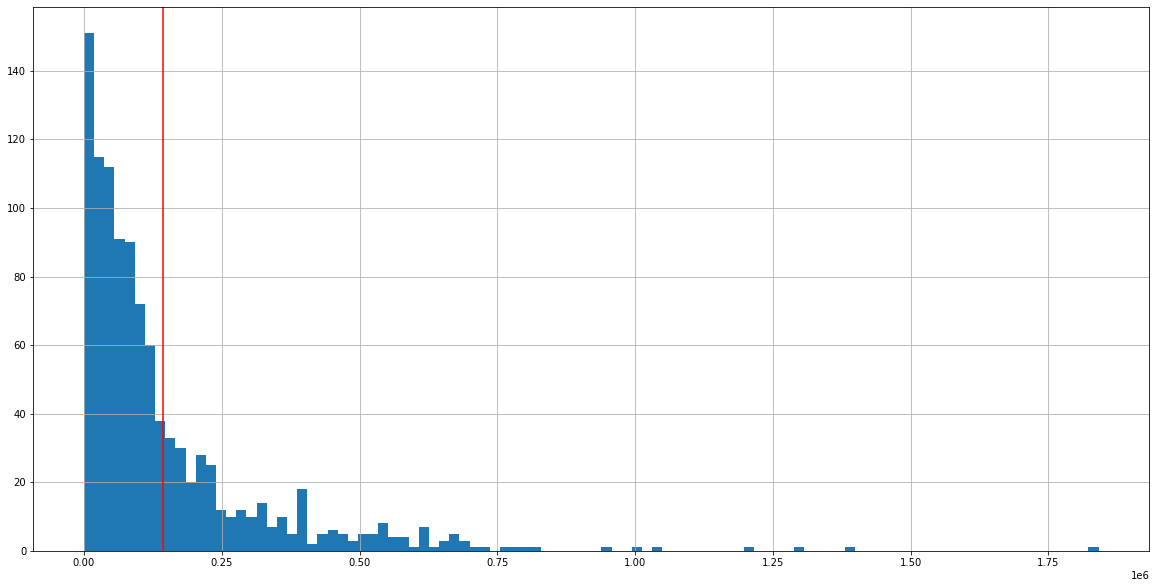

In [26]:
kot = test_table.numvotes.hist(figsize = (20, 10), bins= 100)
# shows the mean 
kot.axvline(x = test_table['numvotes'].mean(), color = 'r')

By the the statistic above i decided that I wanted to go with the 25% quartile or The first quartile (Q1), which is defined as the middle number between the smallest number (minimum) and the median of the data set.

In [27]:
test_table.numvotes.quantile(q = 0.25)

36389.5

In [28]:
len(test_table[test_table.numvotes > 36000])

786

After watching how low the number of data went I thought maybe it would be better if I lowered the number of votes to accept in my analys so I went for 15000 as a minimum number of votes. 

In [29]:
len(test_table[test_table.numvotes > 15000])

924

In [30]:
# Creating a table with all movies that have more then 15000 numbers of votes
test_table = test_table[test_table.numvotes > 15000]
test_table

,movie_id,primary_title,studio,start_year,genres,production_budget,worldwide_gross,roi,averagerating,numvotes,production_budget_mil,worldwide_gross_mil,roi_mil
0,tt0359950,The Secret Life of Walter Mitty,Fox,2013,"Adventure,Comedy,Drama",91000000.0,1.878612e+08,9.686118e+07,7.3,275300,91.0,187.861183,96.861183
1,tt0365907,A Walk Among the Tombstones,Uni.,2014,"Action,Crime,Drama",28000000.0,6.210859e+07,3.410859e+07,6.5,105116,28.0,62.108587,34.108587
2,tt0369610,Jurassic World,Uni.,2015,"Action,Adventure,Sci-Fi",215000000.0,1.648855e+09,1.433855e+09,7.0,539338,215.0,1648.854864,1433.854864
3,tt0376136,The Rum Diary,FD,2011,"Comedy,Drama",45000000.0,2.154473e+07,-2.345527e+07,6.2,94787,45.0,21.544732,-23.455268
4,tt0383010,The Three Stooges,Fox,2012,"Comedy,Family",30000000.0,5.405225e+07,2.405225e+07,5.1,28570,30.0,54.052249,24.052249
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,tt7153766,Unsane,BST,2018,"Drama,Horror,Mystery",1500000.0,1.424493e+07,1.274493e+07,6.4,32049,1.5,14.244931,12.744931
1037,tt7349662,BlacKkKlansman,Focus,2018,"Biography,Crime,Drama",15000000.0,9.301734e+07,7.801734e+07,7.5,149005,15.0,93.017335,78.017335
1039,tt7401588,Instant Family,Par.,2018,"Comedy,Drama",48000000.0,1.197362e+08,7.173619e+07,7.4,46728,48.0,119.736188,71.736188
1041,tt7784604,Hereditary,A24,2018,"Drama,Horror,Mystery",10000000.0,7.013390e+07,6.013390e+07,7.3,151571,10.0,70.133905,60.133905


Because we want to analys each movie by it'ss genre we have to dived the genres, because one movie can have more then one genre.   
For example "The Mule" has three different genres: Crime , Drama and  Thriller.

In [31]:
#It will create a new column which will include all genres but remove the comma
test_table['genre_lst'] = test_table['genres'].str.split(',')

#Will divide the genres equally to the number of genres inside that cell 
df_explode = test_table.explode('genre_lst')
df_explode

,movie_id,primary_title,studio,start_year,genres,production_budget,worldwide_gross,roi,averagerating,numvotes,production_budget_mil,worldwide_gross_mil,roi_mil,genre_lst
0,tt0359950,The Secret Life of Walter Mitty,Fox,2013,"Adventure,Comedy,Drama",91000000.0,187861183.0,96861183.0,7.3,275300,91.0,187.861183,96.861183,Adventure
0,tt0359950,The Secret Life of Walter Mitty,Fox,2013,"Adventure,Comedy,Drama",91000000.0,187861183.0,96861183.0,7.3,275300,91.0,187.861183,96.861183,Comedy
0,tt0359950,The Secret Life of Walter Mitty,Fox,2013,"Adventure,Comedy,Drama",91000000.0,187861183.0,96861183.0,7.3,275300,91.0,187.861183,96.861183,Drama
1,tt0365907,A Walk Among the Tombstones,Uni.,2014,"Action,Crime,Drama",28000000.0,62108587.0,34108587.0,6.5,105116,28.0,62.108587,34.108587,Action
1,tt0365907,A Walk Among the Tombstones,Uni.,2014,"Action,Crime,Drama",28000000.0,62108587.0,34108587.0,6.5,105116,28.0,62.108587,34.108587,Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,tt7784604,Hereditary,A24,2018,"Drama,Horror,Mystery",10000000.0,70133905.0,60133905.0,7.3,151571,10.0,70.133905,60.133905,Horror
1041,tt7784604,Hereditary,A24,2018,"Drama,Horror,Mystery",10000000.0,70133905.0,60133905.0,7.3,151571,10.0,70.133905,60.133905,Mystery
1042,tt7959026,The Mule,WB,2018,"Crime,Drama,Thriller",50000000.0,170857676.0,120857676.0,7.1,58955,50.0,170.857676,120.857676,Crime
1042,tt7959026,The Mule,WB,2018,"Crime,Drama,Thriller",50000000.0,170857676.0,120857676.0,7.1,58955,50.0,170.857676,120.857676,Drama


As we can see there are three columns now of the same movie because it has different genres.  
Lastly, let's check if we have null or none values. so we can clean them and create a neat and clean table of all our data. 

In [32]:
df_explode.isnull().sum()

movie_id                 0
primary_title            0
studio                   0
start_year               0
genres                   0
production_budget        0
worldwide_gross          0
roi                      0
averagerating            0
numvotes                 0
production_budget_mil    0
worldwide_gross_mil      0
roi_mil                  0
genre_lst                0
dtype: int64

Having such a clean data set we have only one thing left to do, and that is, time to analyze data!

# Data Analysis

## Most Successful Genre
We will start this analysis by finding the most successful genre.  
Firstly we will see what are some of the genres we have and how many movies we have per each of them. 

In [33]:
df_explode.genre_lst.value_counts()

Drama          437
Comedy         346
Action         312
Adventure      265
Thriller       169
Crime          151
Romance        129
Sci-Fi          95
Biography       93
Horror          92
Fantasy         80
Animation       78
Mystery         76
Family          51
History         28
Music           25
Sport           16
War              5
Western          5
Musical          4
Documentary      2
Name: genre_lst, dtype: int64

Next, let's find the mean and median worldwide gross for each genre, and arrange them from the one who has the highest average mean. Also will show only top 10 just so we won't have too many table to show. 

In [34]:
# getting mean and median world gross amounts by genre and arrange it by the highest mean 
genre_stats = df_explode.groupby('genre_lst')['worldwide_gross_mil'].agg(['median', 'mean'])
genre_stats = genre_stats.sort_values(by='mean', ascending=False).reset_index()
genre_stats.head(10)

,genre_lst,median,mean
0,Animation,370.468241,451.347563
1,Sci-Fi,287.916633,404.088707
2,Adventure,287.916633,399.650746
3,Action,162.293445,293.737018
4,Fantasy,129.887405,266.029562
5,Family,158.905324,216.414875
6,Western,252.276928,195.791852
7,Comedy,94.157908,175.381388
8,Thriller,76.347393,154.843465
9,Musical,75.792304,147.269406


In [35]:
# This list is to help us arrange all elements into the boxplot by the average mean.
arraneged_list = [item[0] for item in genre_stats.values]

Time to do the same we did for the worldwide gross with the ratings. So we can have a median and mean average ratings, also arranged from the highest mean rating.

In [36]:
# getting mean and median averate rating by genre and arrange it by the highest mean 
genre_stats_rating = df_explode.groupby('genre_lst')['averagerating'].agg(['median', 'mean'])
genre_stats_rating.sort_values(by='mean', ascending=False).head(10)

,median,mean
genre_lst,,
Sport,7.20,7.181250
Biography,7.20,7.147312
History,7.20,7.132143
War,7.20,7.080000
Western,6.60,7.060000
Drama,6.90,6.825172
Musical,6.75,6.750000
Animation,6.80,6.735897
Sci-Fi,6.80,6.711579


Now, we have like two tables showing the top 10 highest rating and worldwide gross mean, its time create graph that shows the spread of each genre plus the average mean for gross and rating.

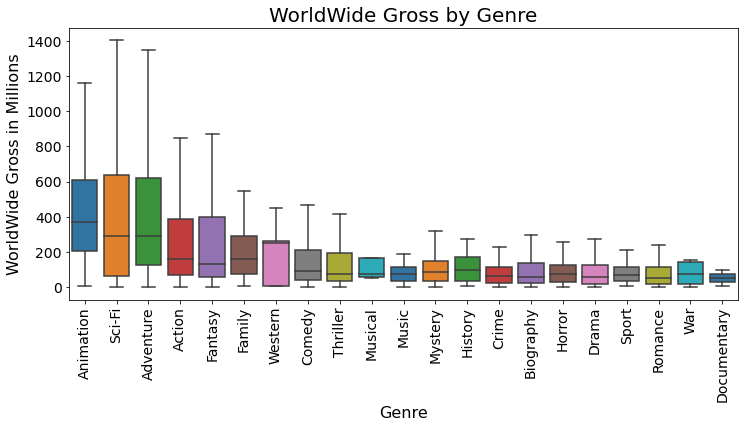

In [37]:
# generating box plot of world gross statistics per genre
# we used the  list we created before for wwgross mean here to arrange the elements from higher to lower
plt.figure(figsize=(12,5))
brplot = sns.boxplot(x='genre_lst', y='worldwide_gross_mil', data=df_explode, showfliers=False, palette = "tab10", order = arraneged_list)
plt.title('WorldWide Gross by Genre', fontsize = 20)
plt.ylabel('WorldWide Gross in Millions', fontsize=16)
plt.xlabel('Genre', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=90);

Judging by the boxplot, mean and median of gross we can say without a doubt that __Animation__ in the most profitable genre of all the times. 

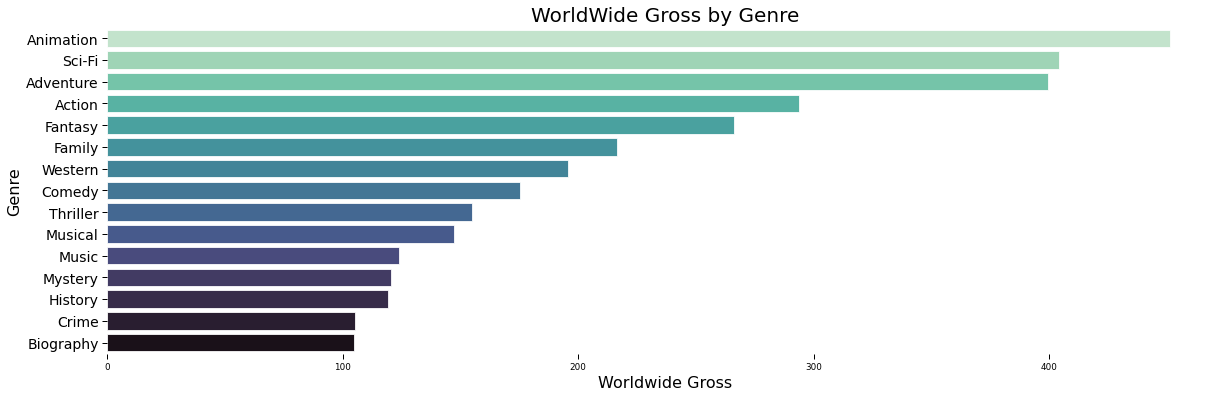

In [38]:
tps10gnr = genre_stats.reset_index()
#creting a barplot, showing the mean wwgross for each genre, from the highest to lowest
sns.set_context('paper')
fig , ax = plt.subplots(figsize = (20, 6))
sns.set_color_codes('pastel')
sns.barplot(x ='mean' , y = 'genre_lst', \
            data = genre_stats.sort_values(by = 'mean', ascending = False).head(15), \
            color = 'b', edgecolor = 'w', palette = "mako_r" )
sns.set_color_codes('muted')
sns.despine(left = True, bottom = True)

plt.ylabel('Genre', fontsize=16)
plt.xlabel('Worldwide Gross', fontsize = 16)
plt.title('WorldWide Gross by Genre', fontsize = 20)
plt.yticks(fontsize= 14)
sns.set_theme()
plt.show();

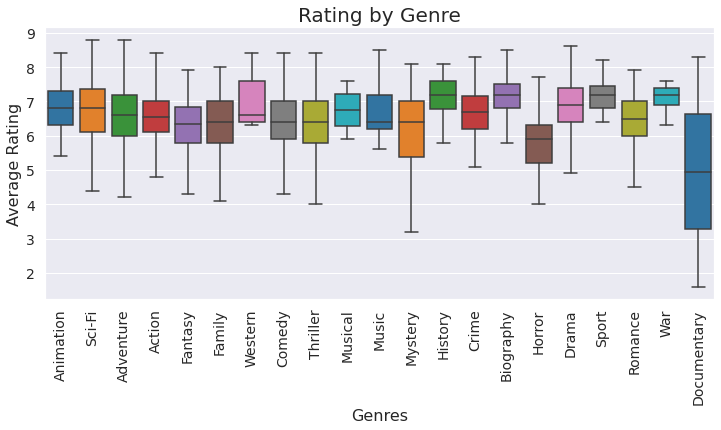

In [39]:
# generating box plot of average rating statistics per genre
plt.figure(figsize=(12,5))
sns.boxplot(x='genre_lst', y='averagerating', data=df_explode, showfliers=False, palette = "tab10", order = arraneged_list)

plt.title('Rating by Genre', fontsize = 20)
plt.ylabel('Average Rating', fontsize=16)
plt.xlabel('Genres', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=90);

Judging by this boxplot even though, we can say that even though animation hasnt the highest mean or median rating, it is among the best genres that have a high 25% quartile. Also animation's interquartile range(IQR) is quite admirable. IQR is the difference between the upper (Q3) and lower (Q1) quartiles, and describes the middle 50% of values when ordered from lowest to highest. The IQR is often seen as a better measure of spread than the range as it is not affected by outliers.

__Lets take the average worldwide gross that animated movies have done during the years__

In [40]:
# Average rating and gross by years for all genres
grouped_multiple_ratings = df_explode.groupby(['start_year', 'genre_lst']).agg({'averagerating': 'mean', 'worldwide_gross_mil': 'mean'})
grouped_multiple_ratings.columns = ['averagerating_mean', 'worldwide_gross_mil_mean' ]
grouped_multiple_ratings = grouped_multiple_ratings.reset_index()

In [41]:
# Average rating and gross by years for Animation
grouped_multiple_main_genres = grouped_multiple_ratings[(grouped_multiple_ratings['genre_lst'] == 'Animation')]
grouped_multiple_main_genres

,start_year,genre_lst,averagerating_mean,worldwide_gross_mil_mean
2,2010,Animation,7.137500,514.539452
22,2011,Animation,6.330769,337.391012
41,2012,Animation,7.033333,409.847248
60,2013,Animation,6.688889,538.595751
80,2014,Animation,6.842857,375.826510
99,2015,Animation,6.914286,483.522066
117,2016,Animation,6.908333,518.153929
134,2017,Animation,6.237500,444.715335
151,2018,Animation,6.680000,475.142863


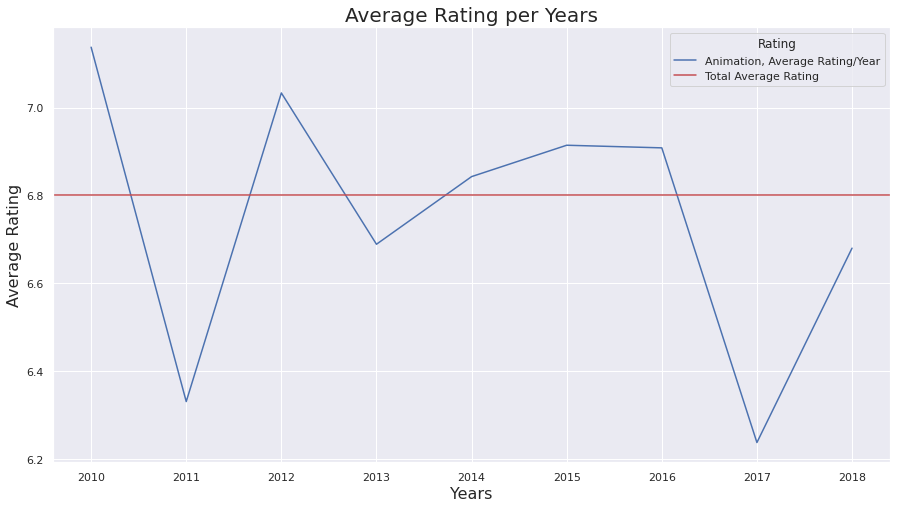

In [42]:
#Pivot chart to show average rating for each year for animation genre, and the total average rating for animation
pivot_graph_rating = grouped_multiple_main_genres.pivot(index='start_year', columns='genre_lst', values=['averagerating_mean']).plot(figsize = (15, 8), grid = True);

pivot_graph_rating.set_ylabel('Average Rating', fontsize=16)
pivot_graph_rating.set_xlabel('Years', fontsize=16)
pivot_graph_rating.set_title('Average Rating per Years', fontsize=20);

plt.axhline(y = 6.8, color = 'r', linestyle = '-')
plt.legend( ['Animation, Average Rating/Year', 'Total Average Rating '], title='Rating')
plt.show()

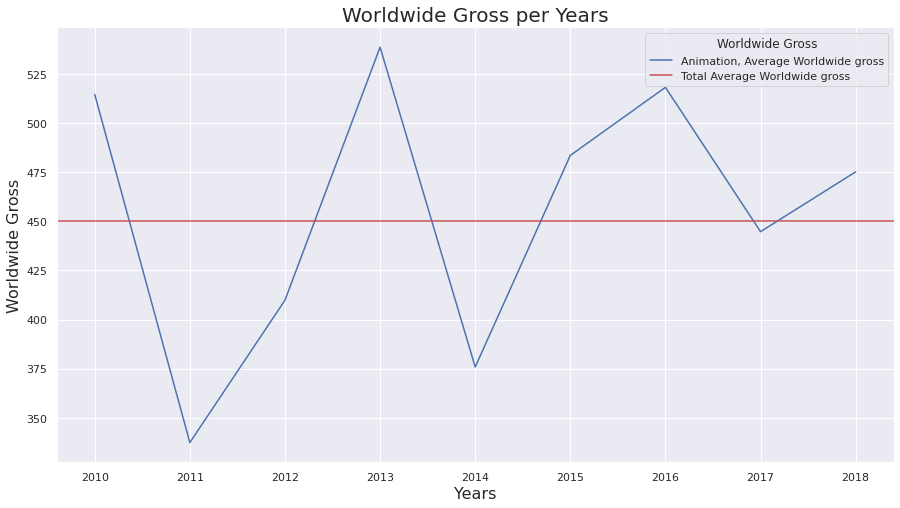

In [43]:
#Pivot chart to show average worldwide gross for each year for animation genre, and the total average gross for animation
pivot_graph_wwgros = grouped_multiple_main_genres.pivot(index='start_year', columns='genre_lst', \
                                                        values=['worldwide_gross_mil_mean']).plot(figsize = (15, 8), grid = True);

pivot_graph_wwgros.set_ylabel('Worldwide Gross', fontsize=16)
pivot_graph_wwgros.set_xlabel('Years', fontsize=16)
pivot_graph_wwgros.set_title('Worldwide Gross per Years', fontsize=20);

plt.axhline(y = 450, color = 'r', linestyle = '-')
plt.legend( ['Animation, Average Worldwide gross', 'Total Average Worldwide gross '], title='Worldwide Gross')
plt.show()

## Most Successful Studio
We will start by finding out how many studios we have and how many movies they have done. 

In [44]:
studios_info = test_table.studio.value_counts()
studios_info

Uni.     107
Fox       99
WB        91
BV        68
Sony      66
        ... 
ParV       1
LD         1
Free       1
Drft.      1
RLJ        1
Name: studio, Length: 66, dtype: int64

As we did for the number of votes where we removed those that have a low number, we are going to do even for the studios. We are going to find out some information using describe() function. 

In [45]:
studios_info.describe()

count     66.000000
mean      14.000000
std       24.404287
min        1.000000
25%        1.000000
50%        3.000000
75%       13.000000
max      107.000000
Name: studio, dtype: float64

As we can see the minimal value and the 25% quartile is 1, the 50% is 3 and the 75% is 13. Having a mean that is more than 75% quartile means that only 25% of the studios have done more than 13 movies. The less studios I have to analyze the better it is for me so I will go with the mean this time so I can eliminate unnecessary studios. 

In [46]:
above_mean = studios_info.reset_index()

In [47]:
above_mean_list = above_mean[above_mean.studio > 14]
len(above_mean_list)

16

As we can see only 16 studios are worth analysing. So we will create a list and use it to select only th erows that have one of the studios in our list.

In [48]:
#List of studios
list_above = [item[0] for item in above_mean_list.values]

In [49]:
#Selecting all movies that the studio is on the list we saved before
grouped_multiple_list_above = df_explode[df_explode.studio.isin(list_above) == True]
grouped_multiple_list_above

,movie_id,primary_title,studio,start_year,genres,production_budget,worldwide_gross,roi,averagerating,numvotes,production_budget_mil,worldwide_gross_mil,roi_mil,genre_lst
0,tt0359950,The Secret Life of Walter Mitty,Fox,2013,"Adventure,Comedy,Drama",91000000.0,187861183.0,96861183.0,7.3,275300,91.0,187.861183,96.861183,Adventure
0,tt0359950,The Secret Life of Walter Mitty,Fox,2013,"Adventure,Comedy,Drama",91000000.0,187861183.0,96861183.0,7.3,275300,91.0,187.861183,96.861183,Comedy
0,tt0359950,The Secret Life of Walter Mitty,Fox,2013,"Adventure,Comedy,Drama",91000000.0,187861183.0,96861183.0,7.3,275300,91.0,187.861183,96.861183,Drama
1,tt0365907,A Walk Among the Tombstones,Uni.,2014,"Action,Crime,Drama",28000000.0,62108587.0,34108587.0,6.5,105116,28.0,62.108587,34.108587,Action
1,tt0365907,A Walk Among the Tombstones,Uni.,2014,"Action,Crime,Drama",28000000.0,62108587.0,34108587.0,6.5,105116,28.0,62.108587,34.108587,Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,tt7401588,Instant Family,Par.,2018,"Comedy,Drama",48000000.0,119736188.0,71736188.0,7.4,46728,48.0,119.736188,71.736188,Comedy
1039,tt7401588,Instant Family,Par.,2018,"Comedy,Drama",48000000.0,119736188.0,71736188.0,7.4,46728,48.0,119.736188,71.736188,Drama
1042,tt7959026,The Mule,WB,2018,"Crime,Drama,Thriller",50000000.0,170857676.0,120857676.0,7.1,58955,50.0,170.857676,120.857676,Crime
1042,tt7959026,The Mule,WB,2018,"Crime,Drama,Thriller",50000000.0,170857676.0,120857676.0,7.1,58955,50.0,170.857676,120.857676,Drama


Time to get the worldwide gross mean and median for studio.

In [50]:
# getting mean and median world gross amounts by studio
studio_stats = grouped_multiple_list_above.groupby('studio')['worldwide_gross_mil'].agg(['median', 'mean'])
studio_stats.columns = ['studio_worldwide_gross_mil_median', 'studio_worldwide_gross_mil_mean' ]
studio_stats.sort_values(by='studio_worldwide_gross_mil_mean', ascending=False).reset_index()

,studio,studio_worldwide_gross_mil_median,studio_worldwide_gross_mil_mean
0,BV,341.528518,498.612667
1,Fox,200.859554,267.519596
2,Sony,195.241105,259.204914
3,Uni.,135.569212,257.512245
4,WB,139.630336,243.735851
5,WB (NL),155.011165,240.664631
6,Par.,174.024768,228.725839
7,LGF,70.652284,149.176977
8,LG/S,109.738840,133.854020
9,SGem,76.200721,102.917579


Judging by the amount let's remove some more studios from the analysis, even though I wanted to keep only 5 I will go for 10, so it can make things more interesting. 

In [51]:
# getting top 10 studios
top10_studios = studio_stats.sort_values(by='studio_worldwide_gross_mil_mean', ascending=False).head(10)
top10_studios.reset_index()
top10_studios

,studio_worldwide_gross_mil_median,studio_worldwide_gross_mil_mean
studio,,
BV,341.528518,498.612667
Fox,200.859554,267.519596
Sony,195.241105,259.204914
Uni.,135.569212,257.512245
WB,139.630336,243.735851
WB (NL),155.011165,240.664631
Par.,174.024768,228.725839
LGF,70.652284,149.176977
LG/S,109.738840,133.854020


Again we will create a list so we can remove all studios who are not in top 10 from our table. This list will also help us later in the boxplot we will create. 

In [52]:
# List of top 10
top10_studios_lst = top10_studios.index.values
top10_studios_lst

array(['BV', 'Fox', 'Sony', 'Uni.', 'WB', 'WB (NL)', 'Par.', 'LGF',
       'LG/S', 'SGem'], dtype=object)

The main table should show only main studios after the code below.

In [53]:
grouped_multiple_top10_studios_lst = grouped_multiple_list_above[grouped_multiple_list_above.studio.isin(top10_studios_lst) == True]
grouped_multiple_top10_studios_lst

,movie_id,primary_title,studio,start_year,genres,production_budget,worldwide_gross,roi,averagerating,numvotes,production_budget_mil,worldwide_gross_mil,roi_mil,genre_lst
0,tt0359950,The Secret Life of Walter Mitty,Fox,2013,"Adventure,Comedy,Drama",91000000.0,187861183.0,96861183.0,7.3,275300,91.0,187.861183,96.861183,Adventure
0,tt0359950,The Secret Life of Walter Mitty,Fox,2013,"Adventure,Comedy,Drama",91000000.0,187861183.0,96861183.0,7.3,275300,91.0,187.861183,96.861183,Comedy
0,tt0359950,The Secret Life of Walter Mitty,Fox,2013,"Adventure,Comedy,Drama",91000000.0,187861183.0,96861183.0,7.3,275300,91.0,187.861183,96.861183,Drama
1,tt0365907,A Walk Among the Tombstones,Uni.,2014,"Action,Crime,Drama",28000000.0,62108587.0,34108587.0,6.5,105116,28.0,62.108587,34.108587,Action
1,tt0365907,A Walk Among the Tombstones,Uni.,2014,"Action,Crime,Drama",28000000.0,62108587.0,34108587.0,6.5,105116,28.0,62.108587,34.108587,Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,tt7401588,Instant Family,Par.,2018,"Comedy,Drama",48000000.0,119736188.0,71736188.0,7.4,46728,48.0,119.736188,71.736188,Comedy
1039,tt7401588,Instant Family,Par.,2018,"Comedy,Drama",48000000.0,119736188.0,71736188.0,7.4,46728,48.0,119.736188,71.736188,Drama
1042,tt7959026,The Mule,WB,2018,"Crime,Drama,Thriller",50000000.0,170857676.0,120857676.0,7.1,58955,50.0,170.857676,120.857676,Crime
1042,tt7959026,The Mule,WB,2018,"Crime,Drama,Thriller",50000000.0,170857676.0,120857676.0,7.1,58955,50.0,170.857676,120.857676,Drama


Like we did with world wide gross of each genre during the years we will do it even for the studios. 

In [54]:
main_studios_gross = grouped_multiple_top10_studios_lst.groupby(['start_year', 'studio']).agg({'worldwide_gross_mil': ['mean'], 'averagerating' : ['mean']})
main_studios_gross.columns = ['studio_worldwide_gross_mil_meanv2', 'averagerating_meanv2' ]
main_studios_gross = main_studios_gross.reset_index()
main_studios_gross.sort_values(by = 'studio_worldwide_gross_mil_meanv2', ascending = False)

,start_year,studio,studio_worldwide_gross_mil_meanv2,averagerating_meanv2
77,2018,BV,787.554180,6.775000
68,2017,BV,704.192658,7.425000
58,2016,BV,629.422867,7.262069
28,2013,BV,561.416924,6.947826
48,2015,BV,503.530460,7.271429
...,...,...,...,...
13,2011,SGem,67.012282,6.020000
70,2017,LG/S,54.876855,5.800000
11,2011,LGF,53.428004,6.809091
81,2018,SGem,51.723644,3.200000


The code below should show boxplot for main 10 studios.

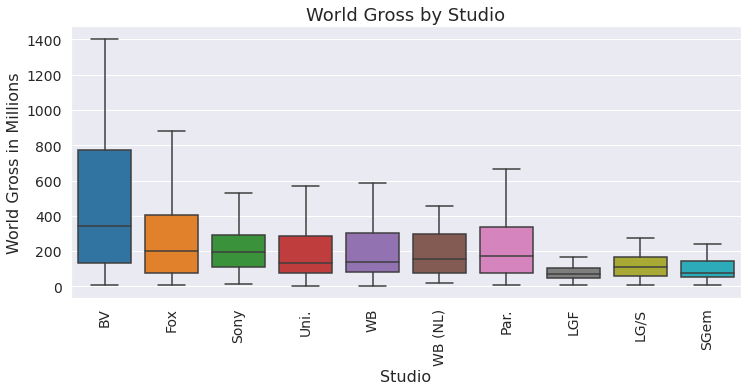

In [55]:
# generating box plot of world gross statistics by studio
plt.figure(figsize=(12,5))
sns.boxplot(x='studio', y='worldwide_gross_mil', data=grouped_multiple_top10_studios_lst, showfliers=False, palette = "tab10", order = top10_studios_lst)
plt.xticks(rotation=90)
plt.ylabel('World Gross in Millions', fontsize=16)
plt.xlabel('Studio', fontsize = 16)
plt.title('World Gross by Studio', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

By analysing the worldwide gross graph we can see that BV is the most profitable studio and has quite a wide spread of income. 
So without hesitation we can say that this is the best studio to create microsoft new movie, but to be sure I will create a chart to see how all studios average ratings.

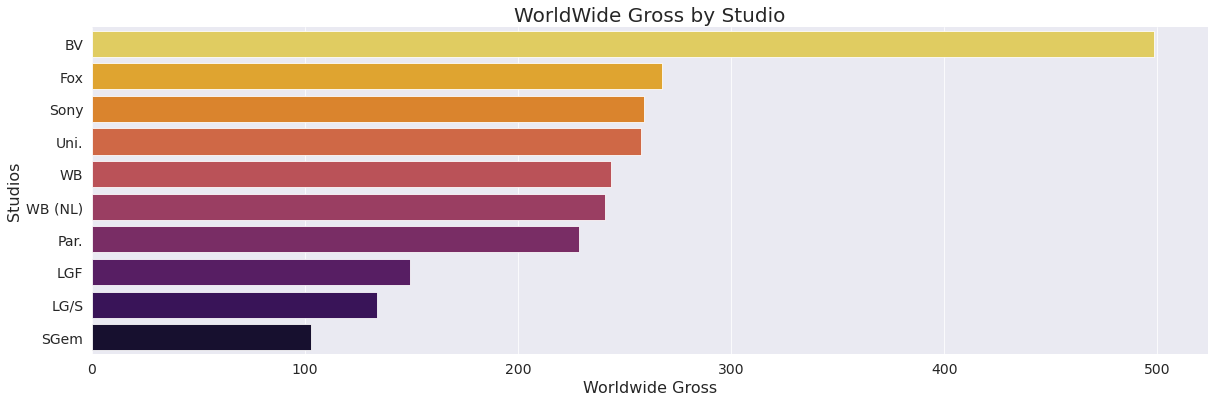

In [56]:
tps10 = top10_studios.reset_index()
#creting a barplot, showing the mean wwgross for each studio, from the highest to lowest
sns.set_context('paper')
fig , ax = plt.subplots(figsize = (20, 6))
sns.set_color_codes('pastel')
sns.barplot(x ='studio_worldwide_gross_mil_mean' , y = 'studio', \
            data = tps10.sort_values(by = 'studio_worldwide_gross_mil_mean', ascending = False), \
            color = 'b', edgecolor = 'w', palette = "inferno_r" )
sns.set_color_codes('muted')
sns.despine(left = True, bottom = True)

plt.ylabel('Studios', fontsize=16)
plt.xlabel('Worldwide Gross', fontsize = 16)
plt.title('WorldWide Gross by Studio', fontsize = 20)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
sns.set_theme()
plt.show();

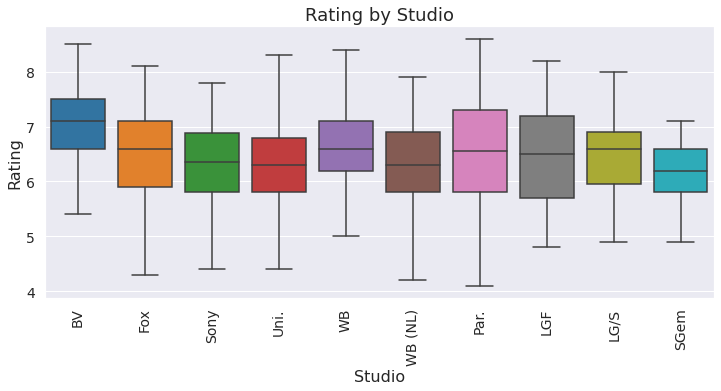

In [57]:
# generating box plot of rating statistics by studio
plt.figure(figsize=(12,5))
sns.boxplot(x='studio', y='averagerating', data=grouped_multiple_top10_studios_lst, showfliers=False, palette = "tab10", order = top10_studios_lst)
plt.xticks(rotation=90)
plt.ylabel('Rating', fontsize=16)
plt.xlabel('Studio', fontsize = 16)
plt.title('Rating by Studio', fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Even after second graph we can see that BV is the best studio to create the movie. What's left is to see, is if they are good with animations.

In [58]:
# Table having all movies that are animated
grouped_multiple_studios_main_genres = grouped_multiple_top10_studios_lst[grouped_multiple_top10_studios_lst['genre_lst'] == 'Animation']
grouped_multiple_studios_main_genres

,movie_id,primary_title,studio,start_year,genres,production_budget,worldwide_gross,roi,averagerating,numvotes,production_budget_mil,worldwide_gross_mil,roi_mil,genre_lst
5,tt0398286,Tangled,BV,2010,"Adventure,Animation,Comedy",260000000.0,5.864772e+08,326477240.0,7.8,366366,260.0,586.477240,326.477240,Animation
12,tt0435761,Toy Story 3,BV,2010,"Adventure,Animation,Comedy",200000000.0,1.068880e+09,868879522.0,8.3,682218,200.0,1068.879522,868.879522,Animation
23,tt0472181,The Smurfs,Sony,2011,"Adventure,Animation,Comedy",110000000.0,5.637493e+08,453749323.0,5.5,77577,110.0,563.749323,453.749323,Animation
32,tt0481499,The Croods,Fox,2013,"Action,Adventure,Animation",135000000.0,5.730684e+08,438068425.0,7.2,176699,135.0,573.068425,438.068425,Animation
62,tt0837562,Hotel Transylvania,Sony,2012,"Animation,Comedy,Family",85000000.0,3.785058e+08,293505812.0,7.1,204571,85.0,378.505812,293.505812,Animation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,tt4701724,Early Man,LGF,2018,"Adventure,Animation,Comedy",50000000.0,4.528589e+07,-4714110.0,6.1,15882,50.0,45.285890,-4.714110,Animation
971,tt4877122,The Emoji Movie,Sony,2017,"Adventure,Animation,Comedy",50000000.0,2.165623e+08,166562312.0,3.2,47294,50.0,216.562312,166.562312,Animation
985,tt5117670,Peter Rabbit,Sony,2018,"Adventure,Animation,Comedy",50000000.0,3.471365e+08,297136477.0,6.6,27908,50.0,347.136477,297.136477,Animation
988,tt5220122,Hotel Transylvania 3: Summer Vacation,Sony,2018,"Adventure,Animation,Comedy",65000000.0,5.270800e+08,462079962.0,6.3,42299,65.0,527.079962,462.079962,Animation


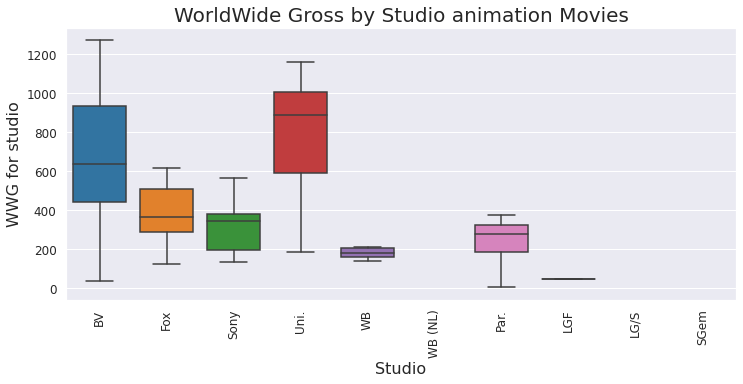

In [59]:
#Boxplot to see worldwide gross for animated movies for different studios
plt.figure(figsize=(12,5))
sns.boxplot(x='studio', y='worldwide_gross_mil', data=grouped_multiple_studios_main_genres, showfliers=False, palette = "tab10", order = top10_studios_lst)
plt.xticks(rotation=90)

plt.title('WorldWide Gross by Studio animation Movies', fontsize = 20)
plt.ylabel('WWG for studio', fontsize=16)
plt.xlabel('Studio', fontsize = 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

Judging by the this boxplot we can understand that when it comes to animated movies Uni. has a better mean gross then BV but the spread is almost the same and taking into consideration the other charts, my decision for the best studio goes to __BV__. 

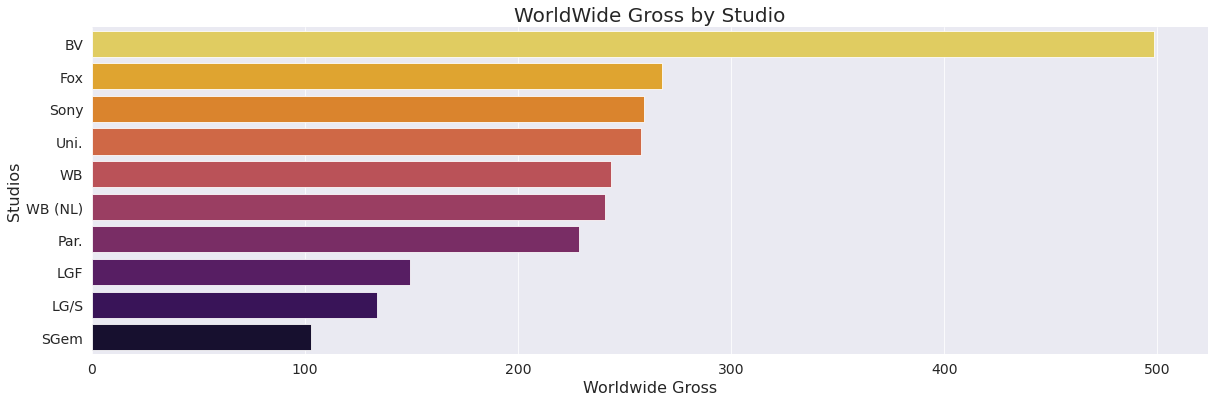

In [60]:
tps10 = top10_studios.reset_index()
#creting a barplot, showing the mean wwgross for each studio, from the highest to lowest
sns.set_context('paper')
fig , ax = plt.subplots(figsize = (20, 6))
sns.set_color_codes('pastel')
sns.barplot(x ='studio_worldwide_gross_mil_mean' , y = 'studio', \
            data = tps10.sort_values(by = 'studio_worldwide_gross_mil_mean', ascending = False), \
            color = 'b', edgecolor = 'w', palette = "inferno_r" )
sns.set_color_codes('muted')
sns.despine(left = True, bottom = True)

plt.ylabel('Studios', fontsize=16)
plt.xlabel('Worldwide Gross', fontsize = 16)
plt.title('WorldWide Gross by Studio', fontsize = 20)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
sns.set_theme()
plt.show();

In [61]:
main_studios_gross_BV = main_studios_gross[main_studios_gross['studio'] == 'BV']
#total average mean gross for BV
main_studios_gross_BV.studio_worldwide_gross_mil_meanv2.mean()

499.2149580075521

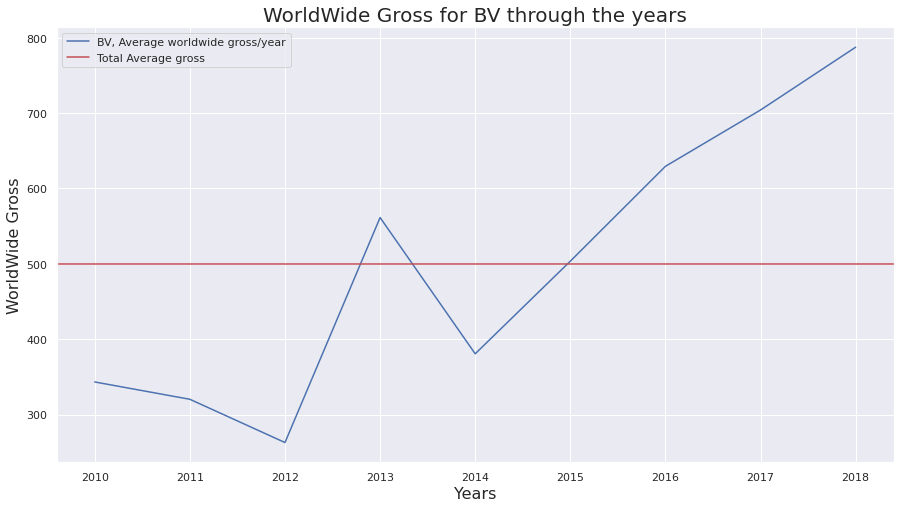

In [62]:
#Graph to show the WorldWide gross for BV through the years
pivot_graph_wwgros_per_studio = main_studios_gross_BV.pivot(index='start_year', columns='studio', values=['studio_worldwide_gross_mil_meanv2']).plot(figsize = (15, 8), grid = True);

pivot_graph_wwgros_per_studio.set_ylabel('WorldWide Gross', fontsize=16)
pivot_graph_wwgros_per_studio.set_xlabel('Years', fontsize=16)
pivot_graph_wwgros_per_studio.set_title('WorldWide Gross for BV through the years', fontsize=20);


plt.axhline(y = 500, color = 'r', linestyle = '-')
plt.legend( ['BV, Average worldwide gross/year', 'Total Average gross '])
plt.show()

## Most Successful Director
Because we didn't want to involve the directors in the table before it's time to get them. The reason I didn't get them involved is that we are going to use only movies that have an alive director here, so the movies where the director is not alive would have been removed, making the selection kind of unbalanced to analyze movies by genre.   
Lets start by creating a table for all directors who are still alive. This table will include the id of the movies so it will make things easier to merge with the main table that has the budgets, worldwide gross and roi. 

In [63]:
#Connecting differente tables so we can choose only the main columns we want
movie_directors = pd.read_sql("""
SELECT movie_id, primary_name, category
FROM movie_basics
JOIN movie_ratings USING(movie_id)
JOIN principals USING(movie_id)
JOIN persons USING(person_id)
WHERE category LIKE('director') AND death_year IS NULL
""", conn)
movie_directors

,movie_id,primary_name,category
0,tt0417610,Alejandro Chomski,director
1,tt0469152,Alyssa R. Bennett,director
2,tt0475290,Ethan Coen,director
3,tt0475290,Joel Coen,director
4,tt0477302,Stephen Daldry,director
...,...,...,...
76825,tt9592190,Mika Rantonen,director
76826,tt9670776,Eimantas Belickas,director
76827,tt9670894,Raju Desai,director
76828,tt9670894,Vishal Desai,director


Time two merge the two tables, but first let's show the table we are going to merge.

In [64]:
test_table

,movie_id,primary_title,studio,start_year,genres,production_budget,worldwide_gross,roi,averagerating,numvotes,production_budget_mil,worldwide_gross_mil,roi_mil,genre_lst
0,tt0359950,The Secret Life of Walter Mitty,Fox,2013,"Adventure,Comedy,Drama",91000000.0,1.878612e+08,9.686118e+07,7.3,275300,91.0,187.861183,96.861183,"[Adventure, Comedy, Drama]"
1,tt0365907,A Walk Among the Tombstones,Uni.,2014,"Action,Crime,Drama",28000000.0,6.210859e+07,3.410859e+07,6.5,105116,28.0,62.108587,34.108587,"[Action, Crime, Drama]"
2,tt0369610,Jurassic World,Uni.,2015,"Action,Adventure,Sci-Fi",215000000.0,1.648855e+09,1.433855e+09,7.0,539338,215.0,1648.854864,1433.854864,"[Action, Adventure, Sci-Fi]"
3,tt0376136,The Rum Diary,FD,2011,"Comedy,Drama",45000000.0,2.154473e+07,-2.345527e+07,6.2,94787,45.0,21.544732,-23.455268,"[Comedy, Drama]"
4,tt0383010,The Three Stooges,Fox,2012,"Comedy,Family",30000000.0,5.405225e+07,2.405225e+07,5.1,28570,30.0,54.052249,24.052249,"[Comedy, Family]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,tt7153766,Unsane,BST,2018,"Drama,Horror,Mystery",1500000.0,1.424493e+07,1.274493e+07,6.4,32049,1.5,14.244931,12.744931,"[Drama, Horror, Mystery]"
1037,tt7349662,BlacKkKlansman,Focus,2018,"Biography,Crime,Drama",15000000.0,9.301734e+07,7.801734e+07,7.5,149005,15.0,93.017335,78.017335,"[Biography, Crime, Drama]"
1039,tt7401588,Instant Family,Par.,2018,"Comedy,Drama",48000000.0,1.197362e+08,7.173619e+07,7.4,46728,48.0,119.736188,71.736188,"[Comedy, Drama]"
1041,tt7784604,Hereditary,A24,2018,"Drama,Horror,Mystery",10000000.0,7.013390e+07,6.013390e+07,7.3,151571,10.0,70.133905,60.133905,"[Drama, Horror, Mystery]"


After some analyzes I decided to remove some of the columns I will not be using from the main table. 

In [65]:
#creates the new and rearrange table with only the column I need
test_table_v2 = test_table.drop(['primary_title', 'studio', 'numvotes', 'start_year', 'genre_lst' , 'production_budget', 'worldwide_gross', 'roi'], axis = 1)
test_table_v2

,movie_id,genres,averagerating,production_budget_mil,worldwide_gross_mil,roi_mil
0,tt0359950,"Adventure,Comedy,Drama",7.3,91.0,187.861183,96.861183
1,tt0365907,"Action,Crime,Drama",6.5,28.0,62.108587,34.108587
2,tt0369610,"Action,Adventure,Sci-Fi",7.0,215.0,1648.854864,1433.854864
3,tt0376136,"Comedy,Drama",6.2,45.0,21.544732,-23.455268
4,tt0383010,"Comedy,Family",5.1,30.0,54.052249,24.052249
...,...,...,...,...,...,...
1035,tt7153766,"Drama,Horror,Mystery",6.4,1.5,14.244931,12.744931
1037,tt7349662,"Biography,Crime,Drama",7.5,15.0,93.017335,78.017335
1039,tt7401588,"Comedy,Drama",7.4,48.0,119.736188,71.736188
1041,tt7784604,"Drama,Horror,Mystery",7.3,10.0,70.133905,60.133905


In [66]:
# Merging the two tables using movie_id as the common column for the two tables.
movie_director_main_table = pd.merge( test_table_v2 , movie_directors, left_on =['movie_id'], right_on = ['movie_id'] )
movie_director_main_table

,movie_id,genres,averagerating,production_budget_mil,worldwide_gross_mil,roi_mil,primary_name,category
0,tt0365907,"Action,Crime,Drama",6.5,28.0,62.108587,34.108587,Scott Frank,director
1,tt0369610,"Action,Adventure,Sci-Fi",7.0,215.0,1648.854864,1433.854864,Colin Trevorrow,director
2,tt0376136,"Comedy,Drama",6.2,45.0,21.544732,-23.455268,Bruce Robinson,director
3,tt0383010,"Comedy,Family",5.1,30.0,54.052249,24.052249,Bobby Farrelly,director
4,tt0383010,"Comedy,Family",5.1,30.0,54.052249,24.052249,Peter Farrelly,director
...,...,...,...,...,...,...,...,...
976,tt7125860,"Drama,Romance",7.2,12.0,19.859167,7.859167,Barry Jenkins,director
977,tt7153766,"Drama,Horror,Mystery",6.4,1.5,14.244931,12.744931,Steven Soderbergh,director
978,tt7349662,"Biography,Crime,Drama",7.5,15.0,93.017335,78.017335,Spike Lee,director
979,tt7401588,"Comedy,Drama",7.4,48.0,119.736188,71.736188,Sean Anders,director


Now that we have merged the tables we need only the rows where the diretor has created movies that has the genre equal to Animation. 

In [67]:
# Table that has genres animation 
Main_table_directorsV2 = movie_director_main_table.loc[movie_director_main_table['genres'].str.contains('Animation')]
Main_table_directorsV2

,movie_id,genres,averagerating,production_budget_mil,worldwide_gross_mil,roi_mil,primary_name,category
5,tt0398286,"Adventure,Animation,Comedy",7.8,260.0,586.477240,326.477240,Nathan Greno,director
6,tt0398286,"Adventure,Animation,Comedy",7.8,260.0,586.477240,326.477240,Byron Howard,director
13,tt0435761,"Adventure,Animation,Comedy",8.3,200.0,1068.879522,868.879522,Lee Unkrich,director
15,tt0448694,"Action,Adventure,Animation",6.6,130.0,554.987477,424.987477,Chris Miller,director
23,tt0472181,"Adventure,Animation,Comedy",5.5,110.0,563.749323,453.749323,Raja Gosnell,director
...,...,...,...,...,...,...,...,...
921,tt4877122,"Adventure,Animation,Comedy",3.2,50.0,216.562312,166.562312,Tony Leondis,director
934,tt5117670,"Adventure,Animation,Comedy",6.6,50.0,347.136477,297.136477,Will Gluck,director
937,tt5220122,"Adventure,Animation,Comedy",6.3,65.0,527.079962,462.079962,Genndy Tartakovsky,director
957,tt6182908,"Adventure,Animation,Comedy",6.7,80.0,213.691277,133.691277,Karey Kirkpatrick,director


Lets conltinue by analysing how many directors we have and how many animated movies they have done. 

In [68]:
#number of directors and how many animated movies
direct_info = Main_table_directorsV2.primary_name.value_counts()
direct_info

Mike Mitchell         4
Don Hall              3
Tom McGrath           3
Chris Renaud          3
Genndy Tartakovsky    3
                     ..
Barry Cook            1
Sarah Smith           1
Tim Hill              1
David Peers           1
Jason Reisig          1
Name: primary_name, Length: 92, dtype: int64

In [69]:
direct_info.describe()

count    92.000000
mean      1.315217
std       0.645004
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       4.000000
Name: primary_name, dtype: float64

By the function above I decided to go again with the mean and remove all directors that have only one movie. To do this i will create a list that include all directors that have more then a movie and will use that to remove all rows that the director is not in this list.

In [70]:
new_direct_info = direct_info.reset_index()
new_direct_info = new_direct_info[new_direct_info['primary_name'] > 1]
new_direct_info.head(10)

,index,primary_name
0,Mike Mitchell,4
1,Don Hall,3
2,Tom McGrath,3
3,Chris Renaud,3
4,Genndy Tartakovsky,3
5,Pierre Coffin,3
6,Carlos Saldanha,3
7,Byron Howard,2
8,Conrad Vernon,2
9,Jennifer Yuh Nelson,2


In [78]:
#List ofdirectors that have more than 1 movie
list_direct = [item[0] for item in new_direct_info.values]

In [72]:
#creating a table that involve all directors in the list and then rearrange them by the roi
grouped_direct_lst = Main_table_directorsV2[Main_table_directorsV2.primary_name.isin(list_direct) == True]
grouped_direct_lst.sort_values(by = 'roi_mil', ascending = False ).head(10)

,movie_id,genres,averagerating,production_budget_mil,worldwide_gross_mil,roi_mil,primary_name,category
668,tt2293640,"Adventure,Animation,Comedy",6.4,74.0,1160.336173,1086.336173,Kyle Balda,director
813,tt3469046,"Adventure,Animation,Comedy",6.3,75.0,1034.727750,959.727750,Kyle Balda,director
814,tt3469046,"Adventure,Animation,Comedy",6.3,75.0,1034.727750,959.727750,Pierre Coffin,director
472,tt1690953,"Adventure,Animation,Comedy",7.4,76.0,975.216835,899.216835,Pierre Coffin,director
473,tt1690953,"Adventure,Animation,Comedy",7.4,76.0,975.216835,899.216835,Chris Renaud,director
769,tt2948356,"Adventure,Animation,Comedy",8.0,150.0,1019.429616,869.429616,Byron Howard,director
770,tt2948356,"Adventure,Animation,Comedy",8.0,150.0,1019.429616,869.429616,Rich Moore,director
13,tt0435761,"Adventure,Animation,Comedy",8.3,200.0,1068.879522,868.879522,Lee Unkrich,director
746,tt2709768,"Adventure,Animation,Comedy",6.5,75.0,886.750534,811.750534,Chris Renaud,director
464,tt1667889,"Adventure,Animation,Comedy",6.6,95.0,879.765137,784.765137,Mike Thurmeier,director


Now is time to find the mean roi and average rating for each director.  

In [77]:
#Create a table with mean roi and average rating for each director, arrange them by the highest mean roi
main_direct_roi_rating = grouped_direct_lst.groupby(['primary_name']).agg({'roi_mil': ['mean']})
main_direct_roi_rating.columns = ['drct_roi_mil_mean']
main_direct_roi_rating = main_direct_roi_rating.reset_index()
best_roi_direct = main_direct_roi_rating.sort_values(by = 'drct_roi_mil_mean', ascending = False).head(15)
best_roi_direct.head(10)

,primary_name,drct_roi_mil_mean
12,Kyle Balda,1023.031961
16,Pierre Coffin,777.803053
13,Lee Unkrich,745.943812
2,Chris Renaud,728.477314
18,Rich Moore,600.470569
0,Byron Howard,597.953428
15,Mike Thurmeier,540.960909
4,Chris Williams,487.322597
19,Steve Martino,467.928374
11,Jennifer Yuh Nelson,446.218344


Having created this table is time to determinate who is the director with the highest ROI gross. For this one we are going to use bar plots. 

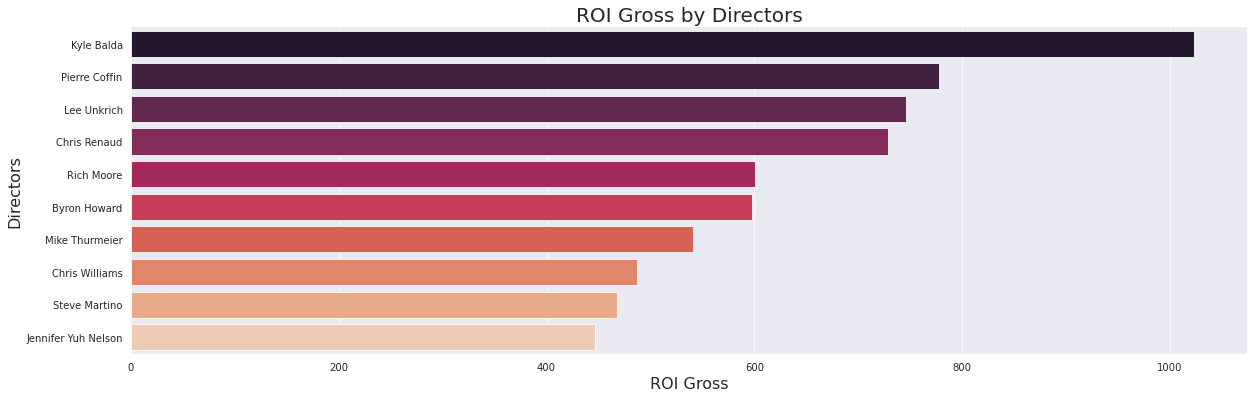

In [74]:
#creting a barplot, showing the mean rating for top 10 directors, from the highest to lowest
sns.set_context('paper')
fig , ax = plt.subplots(figsize = (20, 6))
sns.set_color_codes('pastel')
sns.barplot(x ='drct_roi_mil_mean' , y = 'primary_name', data = best_roi_direct.head(10), color = 'b', edgecolor = 'w', palette = "rocket" )
sns.set_color_codes('muted')
sns.despine(left = True, bottom = True)

plt.ylabel('Directors', fontsize=16)
plt.xlabel('ROI Gross', fontsize = 16)
plt.title('ROI Gross by Directors', fontsize = 20)
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
sns.set_theme()
plt.show();

Judging by the bar plot that has the ROI for each director , it looks like Kyle Balda is the most profitable director when it comes to animation. 

In [75]:
Main_table_directorsV2[(Main_table_directorsV2['primary_name'] == 'Kyle Balda')]

,movie_id,genres,averagerating,production_budget_mil,worldwide_gross_mil,roi_mil,primary_name,category
668,tt2293640,"Adventure,Animation,Comedy",6.4,74.0,1160.336173,1086.336173,Kyle Balda,director
813,tt3469046,"Adventure,Animation,Comedy",6.3,75.0,1034.727750,959.727750,Kyle Balda,director


As we can see, with a budget of almost 75 millions dollars, he has collected almost 1100 million worldwide gross income for movie.

At the end, it is always a best practice to close the connection to the database.

In [76]:
conn.close()

# Conclusion

As a conclusion, after finished analyzing all the data from the three main source of data provided, my recommendation for  Microsoft, is:  
To create an __Animation__ movie, with __"BV"__ or __"Buena Vista Animation"__ studio, and to hire as a director, __Kyle Balda__ .  
The combination of the three is a guaranteed success for Microsoft. 

